In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sn
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [4]:
X_train, X_test, y_train, y_test=train_test_split(df[['sepal length (cm)','sepal width (cm)','petal length (cm)',	'petal width (cm)']],df.target,test_size=0.2)

In [5]:
input = df[['sepal length (cm)','sepal width (cm)','petal length (cm)',	'petal width (cm)']]

In [6]:
scalar = MinMaxScaler()
scalar.fit(input)
input = scalar.transform(input)

In [7]:
model = KMeans(n_clusters=3)
model.fit(input,df.target)

KMeans(n_clusters=3)

In [8]:
prediction = model.predict(input)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [9]:
df['cluster'] = prediction

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,cluster
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


In [11]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]



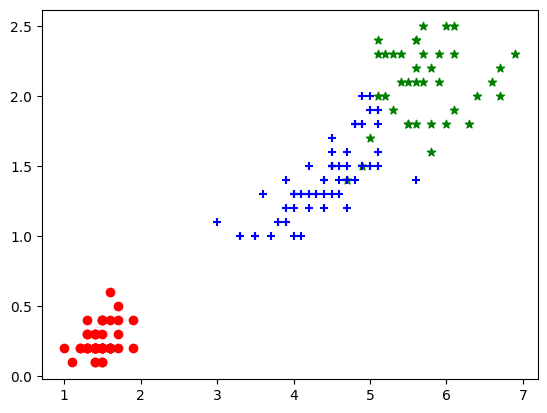

In [12]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'] , marker= 'o' , color ='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'] , marker= '*' , color ='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'] , marker= '+' , color ='blue')


In [13]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(input)
    sse.append(km.inertia_)

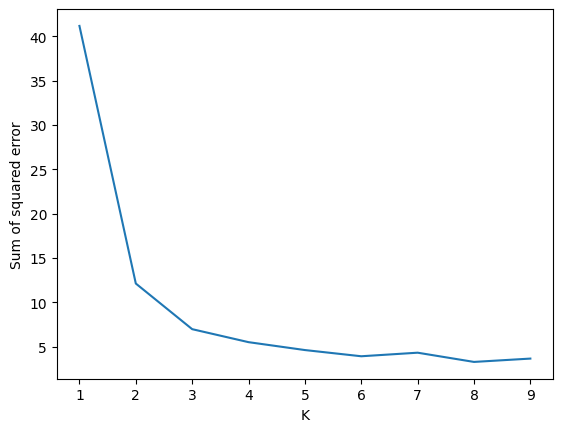

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [17]:
# Step 1: Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

# Step 3: Create mapping from cluster to true label
train_preds = kmeans.predict(X_train_scaled)
label_map = {}

for cluster in range(3):
    mask = (train_preds == cluster)
    true_labels = y_train[mask]
    if len(true_labels) == 0:
        continue
    label_map[cluster] = mode(true_labels)[0][0]

# Step 4: Predict test data and map the labels
y_pred_clusters = kmeans.predict(X_test_scaled)
mapped_preds = np.array([label_map[cluster] for cluster in y_pred_clusters])

# Step 5: Print classification report
print(classification_report(y_test, mapped_preds))


IndexError: invalid index to scalar variable.